In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

The first step to any kind of exploration and modelling requires us to load the data file into the environment.¶


In [21]:
# Trainingset = pd.read_csv("Training.csv")
# Testset = pd.read_csv("Testing.csv")
# Trainingset_copy = pd.read_csv("Training - Copy.csv")
Symptom_severity = pd.read_csv("Symptom-severity.csv")
# Dataset = pd.read_csv("Dataset.csv")
Dataset1 = pd.read_csv("Dataset1.csv")

In [22]:
Dataset1.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
Dataset1_ = Dataset1[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17']].values.ravel()

In [24]:
Dataset1_

array(['itching', ' skin_rash', ' nodal_skin_eruptions', ..., nan, nan,
       nan], dtype=object)

In [25]:
symp = pd.unique(Dataset1_)
symp

array(['itching', ' skin_rash', ' nodal_skin_eruptions',
       ' dischromic _patches', nan, ' continuous_sneezing', ' shivering',
       ' chills', ' watering_from_eyes', ' stomach_pain', ' acidity',
       ' ulcers_on_tongue', ' vomiting', ' cough', ' chest_pain',
       ' yellowish_skin', ' nausea', ' loss_of_appetite',
       ' abdominal_pain', ' yellowing_of_eyes', ' burning_micturition',
       ' spotting_ urination', ' passage_of_gases', ' internal_itching',
       ' indigestion', ' muscle_wasting', ' patches_in_throat',
       ' high_fever', ' extra_marital_contacts', ' fatigue',
       ' weight_loss', ' restlessness', ' lethargy',
       ' irregular_sugar_level', ' blurred_and_distorted_vision',
       ' obesity', ' excessive_hunger', ' increased_appetite',
       ' polyuria', ' sunken_eyes', ' dehydration', ' diarrhoea',
       ' breathlessness', ' family_history', ' mucoid_sputum',
       ' headache', ' dizziness', ' loss_of_balance',
       ' lack_of_concentration', ' stiff

In [26]:
symp = symp.tolist()
symp = [i for i in symp if str(i) != "nan"]

In [27]:
symps = []
for i in symp:
    j = i.replace(' ','')
    symps.append(j)


In [28]:
symptoms = pd.DataFrame(columns = symps,index = Dataset1.index)

In [29]:
Dataset1["Symptoms"] = 0

In [30]:
records = Dataset1.shape[0]
for i in range(records):
    values = Dataset1.iloc[i].values
    values = values.tolist()
    if 0 in values:
        Dataset1["Symptoms"][i] = values[1:values.index(0)]
    else:
        Dataset1["Symptoms"][i] = values[1:]

<ipython-input-30-93c0678404ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1["Symptoms"][i] = values[1:values.index(0)]
C:\Users\quame\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [31]:
Dataset1["Symptoms"]

0       [itching,  skin_rash,  nodal_skin_eruptions,  ...
1       [ skin_rash,  nodal_skin_eruptions,  dischromi...
2       [itching,  nodal_skin_eruptions,  dischromic _...
3       [itching,  skin_rash,  dischromic _patches, na...
4       [itching,  skin_rash,  nodal_skin_eruptions, n...
                              ...                        
4915    [ vomiting,  headache,  nausea,  spinning_move...
4916    [ skin_rash,  pus_filled_pimples,  blackheads,...
4917    [ burning_micturition,  bladder_discomfort,  f...
4918    [ skin_rash,  joint_pain,  skin_peeling,  silv...
4919    [ skin_rash,  high_fever,  blister,  red_sore_...
Name: Symptoms, Length: 4920, dtype: object

In [32]:
symptoms["Symptoms"] = Dataset1["Symptoms"]
symptoms["Symptoms"] = symptoms["Symptoms"].astype(str).str.replace(' ', '')
symptoms

,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_ofurine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Symptoms
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['itching','skin_rash','nodal_skin_eruptions',..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['skin_rash','nodal_skin_eruptions','dischromi..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['itching','nodal_skin_eruptions','dischromic_..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['itching','skin_rash','dischromic_patches',na..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['itching','skin_rash','nodal_skin_eruptions',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['vomiting','headache','nausea','spinning_move..."
4916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['skin_rash','pus_filled_pimples','blackheads'..."
4917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['burning_micturition','bladder_discomfort','f..."
4918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['skin_rash','joint_pain','skin_peeling','silv..."


In [33]:
dict_ = Symptom_severity.set_index('Symptom')['weight'].to_dict()


In [34]:
for key, value in dict_.items():
    symptoms[key] = symptoms.apply(lambda x:value if key in x.Symptoms else 0, axis=1)

In [35]:
symptoms.head()


,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Symptoms,prognosis
0,1,3,4,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"['itching','skin_rash','nodal_skin_eruptions',...",0
1,0,3,4,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"['skin_rash','nodal_skin_eruptions','dischromi...",0
2,1,0,4,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"['itching','nodal_skin_eruptions','dischromic_...",0
3,1,3,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"['itching','skin_rash','dischromic_patches',na...",0
4,1,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"['itching','skin_rash','nodal_skin_eruptions',...",0


In [36]:
symptoms["Disease"] = Dataset1["Disease"]
symptoms = symptoms.drop("Symptoms",axis=1)

In [37]:
symptoms.to_csv('output.csv')


To understand the data better that we are going to deal with we would like to have a look at the basic numerical stats of the data like the mean, maximum etc. columnwise.¶


In [38]:
symptoms.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'dischromic_patches',
       'continuous_sneezing', 'shivering', 'chills', 'watering_from_eyes',
       'stomach_pain', 'acidity',
       ...
       'continuous_feel_of_urine', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis', 'Disease'],
      dtype='object', length=133)

In [39]:
symptoms.describe().T

,count,mean,std,min,25%,50%,75%,max
itching,4920.0,0.160976,0.367546,0.0,0.0,0.0,0.0,1.0
skin_rash,4920.0,0.479268,1.099251,0.0,0.0,0.0,0.0,3.0
nodal_skin_eruptions,4920.0,0.087805,0.586157,0.0,0.0,0.0,0.0,4.0
dischromic_patches,4920.0,0.131707,0.879235,0.0,0.0,0.0,0.0,6.0
continuous_sneezing,4920.0,0.180488,0.830371,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...
inflammatory_nails,4920.0,0.046341,0.300922,0.0,0.0,0.0,0.0,2.0
blister,4920.0,0.092683,0.601843,0.0,0.0,0.0,0.0,4.0
red_sore_around_nose,4920.0,0.046341,0.300922,0.0,0.0,0.0,0.0,2.0
yellow_crust_ooze,4920.0,0.069512,0.451382,0.0,0.0,0.0,0.0,3.0


Since this is a classification problem it would be important and interesting to the distribution of target variables for the data.¶


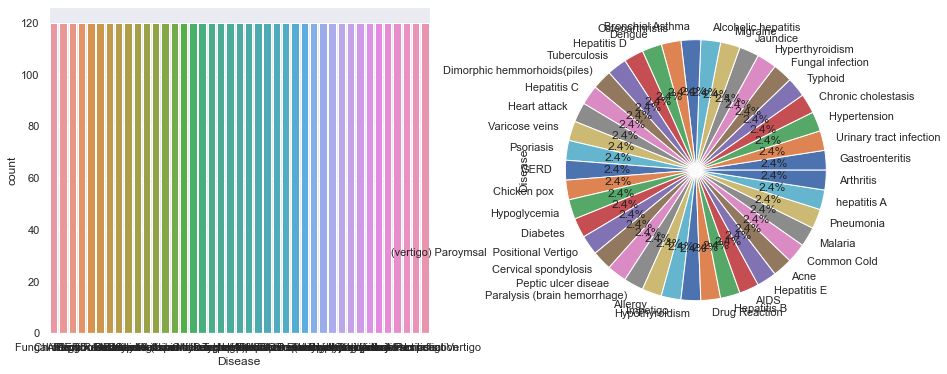

In [48]:
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='Disease', data=symptoms, ax=ax[0])
_ = symptoms['Disease'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

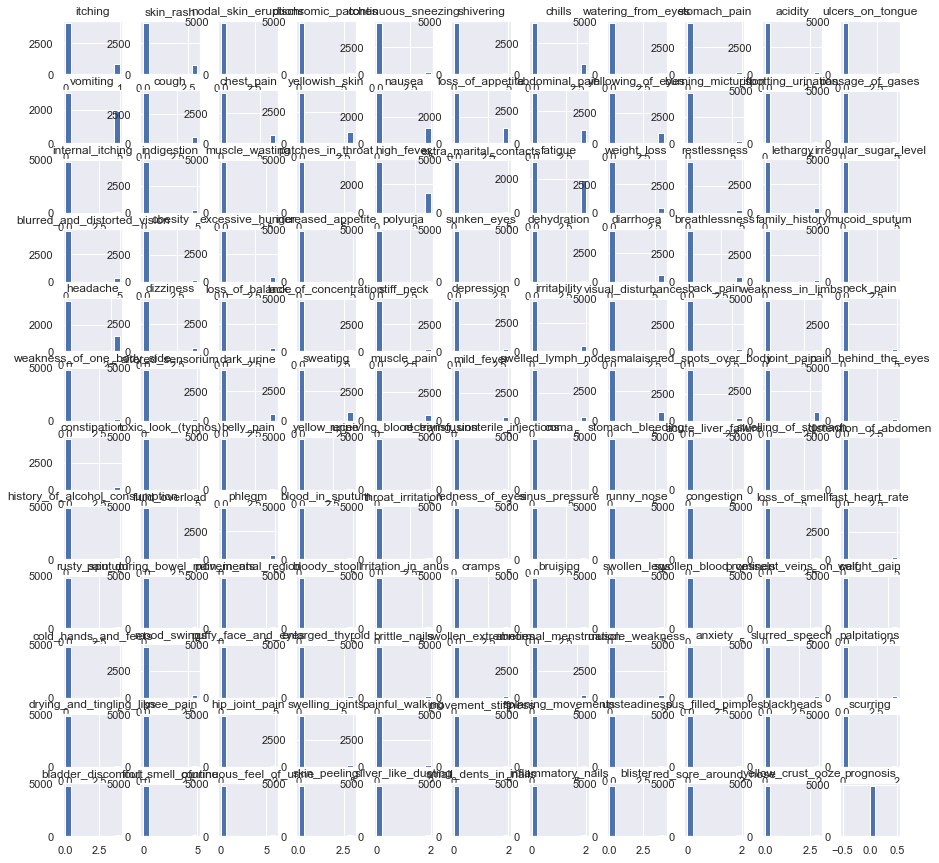

In [49]:
symptoms.hist(figsize=(15,15))
plt.show()

Among the various questions that arise, one crucial question is to ask whether the data contains any missing values? Lets see how we can find the answer to that.¶


In [50]:
symptoms.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
dischromic_patches      0
continuous_sneezing     0
                       ..
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Disease                 0
Length: 133, dtype: int64

As we can see the target variable has text values as the name of classes. When a machine learning algorithm takes input it expects all values to be numerical and can not handle text values directly. It will simply throw an error if text value is fed to the model. Hence we need to replace text value with a number that can represent the class. Label Encoder tool helps us perform the same.


In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=symptoms.drop('Disease',axis=1)
Y=le.fit_transform(symptoms['Disease'])

In [52]:
le.classes_

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [53]:
le.inverse_transform([0,1,2,3,4,5,6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                     21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [54]:
dict(zip(le.inverse_transform([0,1,2,3,4,5,6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                     21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]),[0,1,2,3,4,5,6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                     21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]))

{'(vertigo) Paroymsal  Positional Vertigo': 0,
 'AIDS': 1,
 'Acne': 2,
 'Alcoholic hepatitis': 3,
 'Allergy': 4,
 'Arthritis': 5,
 'Bronchial Asthma': 6,
 'Cervical spondylosis': 7,
 'Chicken pox': 8,
 'Chronic cholestasis': 9,
 'Common Cold': 10,
 'Dengue': 11,
 'Diabetes ': 12,
 'Dimorphic hemmorhoids(piles)': 13,
 'Drug Reaction': 14,
 'Fungal infection': 15,
 'GERD': 16,
 'Gastroenteritis': 17,
 'Heart attack': 18,
 'Hepatitis B': 19,
 'Hepatitis C': 20,
 'Hepatitis D': 21,
 'Hepatitis E': 22,
 'Hypertension ': 23,
 'Hyperthyroidism': 24,
 'Hypoglycemia': 25,
 'Hypothyroidism': 26,
 'Impetigo': 27,
 'Jaundice': 28,
 'Malaria': 29,
 'Migraine': 30,
 'Osteoarthristis': 31,
 'Paralysis (brain hemorrhage)': 32,
 'Peptic ulcer diseae': 33,
 'Pneumonia': 34,
 'Psoriasis': 35,
 'Tuberculosis': 36,
 'Typhoid': 37,
 'Urinary tract infection': 38,
 'Varicose veins': 39,
 'hepatitis A': 40}

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, stratify=Y, test_size = 0.3,random_state = 42)

In [56]:
X_train

,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_ofurine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
2585,0,0,0,0,0,0,0,0,5,3,...,0,0,0,0,0,0,0,0,0,0
1917,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,0,3,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2205,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2499,0,3,0,0,0,0,0,0,0,0,...,0,0,3,2,2,2,0,0,0,0
4697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)

1.0
1.0


C:\Users\quame\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


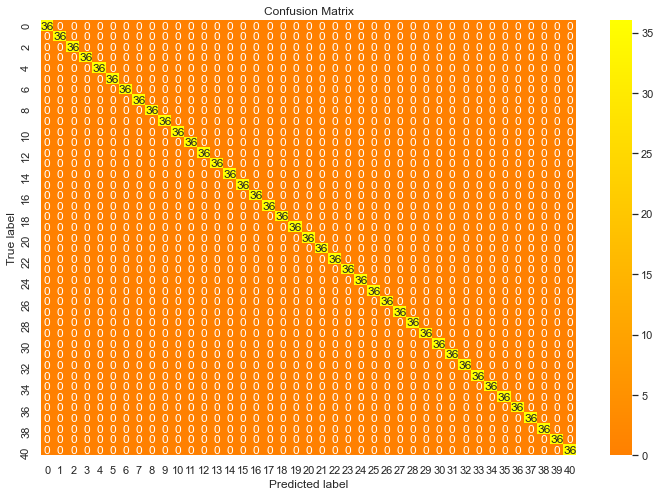

In [66]:
cm_logreg = confusion_matrix(y_test,y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=6, criterion = 'entropy', 
                            min_samples_leaf= 1,min_samples_split= 2)
rf.fit(X_train, y_train)

y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

0.9962253193960511
0.9925474254742548


In [61]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

F1-score% = 100.0 | Accuracy% = 100.0


<AxesSubplot:>

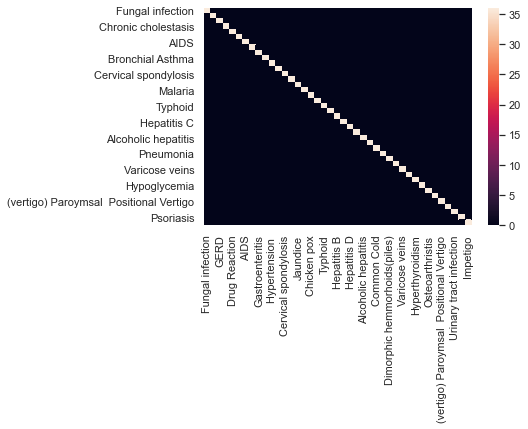

In [63]:
#Initialize and train a Support vector classifier

model = SVC()
model.fit(X_train, y_train)
preds = model.predict(X_test)

#Plot the confusion matrix for 25 diseases and calculate f1, accuracy

conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=symptoms['Disease'].unique(), columns=symptoms['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)